In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

plt.style.use("seaborn-v0_8")
sns.set_theme(context="notebook", style="whitegrid", palette="Set2")

pd.set_option("display.max_columns", 100)

CSV_PATH = Path("data/biroylikgarovlilar_redone.csv")
REPORTS_DIR = Path("reports"); REPORTS_DIR.mkdir(exist_ok=True)

df = pd.read_csv(CSV_PATH)
df.head()

,Код,Наименование,Облать,Город/район,Номер,Дата,Сумма,% ставка,Гос.номер,Марка,Тип кузова,Тип,Цвет,Год выпуска,Страна производитель
0,99224744,RAXIMOVA QIMMATXON SULAYMONOVNA,АНДИЖОН ВИЛОЯТИ,АСАКА ТУМАНИ,02-1468/25K,01.08.2025,"30,000,000.00",48.0,60B960AB,MALIBU,SEDAN,Легковые автомобили,ОЛИМПИЙСКИЙ БЕЛЫЙ,2012,Узбекистан
1,99224753,NAZAROVA MUXABBAT BAYNAZAROVNA,АНДИЖОН ВИЛОЯТИ,АНДИЖОН ТУМАНИ,02-1469/25K,01.08.2025,"30,000,000.00",48.0,60C634ZA,COBALT,SEDAN,Легковые автомобили,KULRANG SEROPERLAMUTROVIY,2014,Узбекистан
2,99137961,Komilov Muxammad Ali Baxriddin o’g’li,АНДИЖОН ВИЛОЯТИ,АСАКА ТУМАНИ,02-1470/25K,01.08.2025,"28,000,000.00",48.0,60Z871DB,SPARK,XETCHBEK,Легковые автомобили,СЕРЕБРИСТЫЙ,2015,Узбекистан
3,99101300,Ruziboyev Ilxomjon Kosimovich,АНДИЖОН ВИЛОЯТИ,МАРХАМАТ ТУМАНИ,02-1471/25K,01.08.2025,"20,000,000.00",48.0,60L218EB,LACETTI,SEDAN,Легковые автомобили,KULRANG SEREBRISTIY,2015,Узбекистан
4,99224814,JALOLOV ANVAR MUXAMADAMINOVICH,АНДИЖОН ВИЛОЯТИ,МАРХАМАТ ТУМАНИ,02-1472/25K,01.08.2025,"99,000,000.00",42.0,60K839EB,LACETTI,SEDAN,Легковые автомобили,DARKMOON BLUE MET,2023,Узбекистан


In [2]:
print("Shape:", df.shape)
print("\nColumn names:", df.columns.tolist())
df.info()

Shape: (492, 15)

Column names: ['Код', 'Наименование', 'Облать', 'Город/район', 'Номер', 'Дата', 'Сумма', '% ставка', 'Гос.номер', 'Марка', 'Тип кузова', 'Тип', 'Цвет', 'Год выпуска', 'Страна производитель']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492 entries, 0 to 491
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Код                   492 non-null    int64  
 1   Наименование          492 non-null    object 
 2   Облать                492 non-null    object 
 3   Город/район           492 non-null    object 
 4   Номер                 492 non-null    object 
 5   Дата                  492 non-null    object 
 6   Сумма                 492 non-null    object 
 7   % ставка              492 non-null    float64
 8   Гос.номер             492 non-null    object 
 9   Марка                 492 non-null    object 
 10  Тип кузова            492 non-null    object 
 11  Тип               

In [3]:
df["Дата"] = pd.to_datetime(df["Дата"], dayfirst=True, errors="coerce")

df["Сумма_num"] = (df["Сумма"].astype(str)
                   .str.replace(",", "", regex=False)
                   .str.replace(" ", "", regex=False)
                   .astype(float))

df["Возраст авто"] = df["Дата"].dt.year - df["Год выпуска"]

df[["Сумма", "Сумма_num", "% ставка", "Год выпуска", "Возраст авто"]].head()


,Сумма,Сумма_num,% ставка,Год выпуска,Возраст авто
0,"30,000,000.00",30000000.0,48.0,2012,13
1,"30,000,000.00",30000000.0,48.0,2014,11
2,"28,000,000.00",28000000.0,48.0,2015,10
3,"20,000,000.00",20000000.0,48.0,2015,10
4,"99,000,000.00",99000000.0,42.0,2023,2


In [4]:
summary = {
    "Всего записей": len(df),
    "Уникальные заемщики": df["Наименование"].nunique(),
    "Уникальные регионы": df["Облать"].nunique(),
    "Уникальные районы": df["Город/район"].nunique(),
    "Уникальные марки авто": df["Марка"].nunique(),
    "Средняя сумма кредита": df["Сумма_num"].mean(),
    "Медиана суммы кредита": df["Сумма_num"].median(),
    "Средняя ставка (%)": df["% ставка"].mean(),
}
pd.Series(summary)


Всего записей            4.920000e+02
Уникальные заемщики      4.860000e+02
Уникальные регионы       3.000000e+00
Уникальные районы        1.900000e+01
Уникальные марки авто    6.200000e+01
Средняя сумма кредита    3.683841e+07
Медиана суммы кредита    3.200000e+07
Средняя ставка (%)       4.702439e+01
dtype: float64

In [21]:

plt.style.use("seaborn-v0_8"); plt.rcParams["figure.figsize"]=(10,6)

df = pd.read_csv("data/biroylikgarovlilar_redone.csv")

df["Дата"] = pd.to_datetime(df["Дата"], dayfirst=True, errors="coerce")
df["Сумма_num"] = (
    df["Сумма"].str.replace(",","").str.replace(" ","").astype(float)
)


In [22]:
region_grp = df.groupby("Облать").agg(
    sum_amount=("Сумма_num","sum"),
    count=("Код","count"),
    avg_amount=("Сумма_num","mean"),
    avg_rate=("% ставка","mean")
).sort_values("sum_amount", ascending=False)
region_grp


,sum_amount,count,avg_amount,avg_rate
Облать,,,,
АНДИЖОН ВИЛОЯТИ,1.800850e+10,489,3.682720e+07,47.030675
НАМАНГАН ВИЛОЯТИ,7.400000e+07,2,3.700000e+07,45.000000
ФАРГОНА ВИЛОЯТИ,4.200000e+07,1,4.200000e+07,48.000000


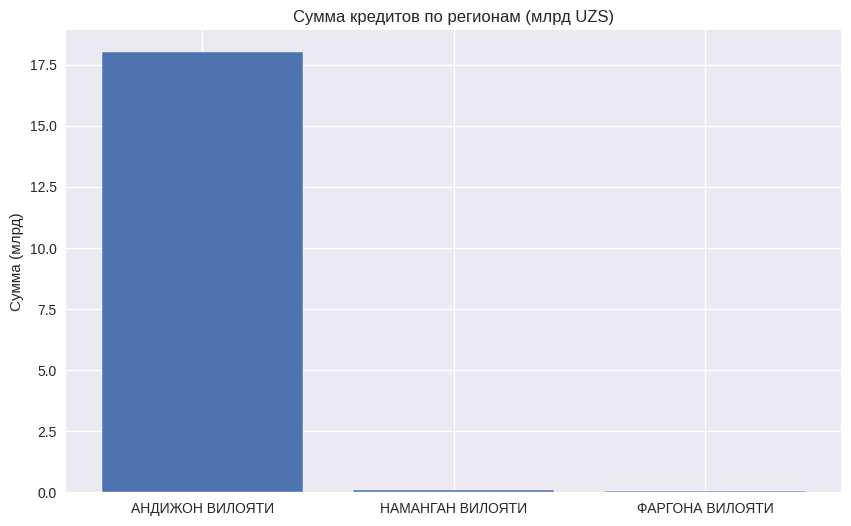

In [23]:
plt.bar(region_grp.index, region_grp["sum_amount"]/1e9)
plt.title("Сумма кредитов по регионам (млрд UZS)")
plt.ylabel("Сумма (млрд)")
plt.show()


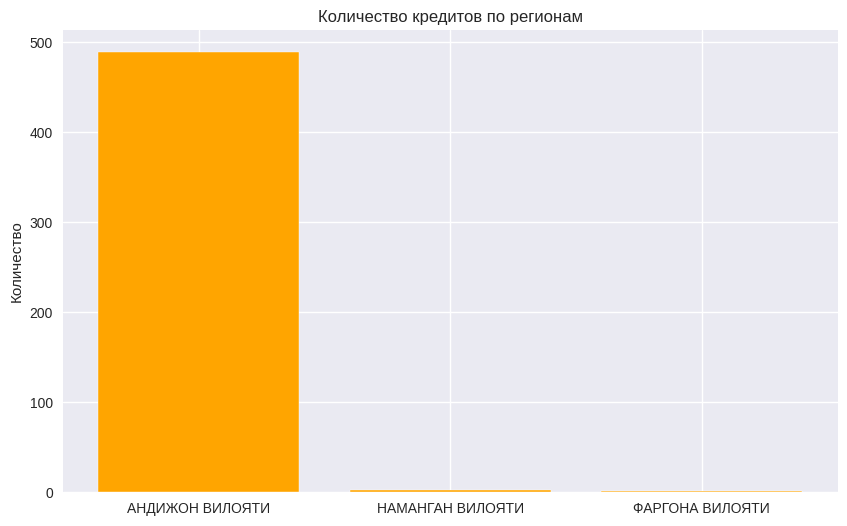

In [24]:
plt.bar(region_grp.index, region_grp["count"], color="orange")
plt.title("Количество кредитов по регионам")
plt.ylabel("Количество")
plt.show()


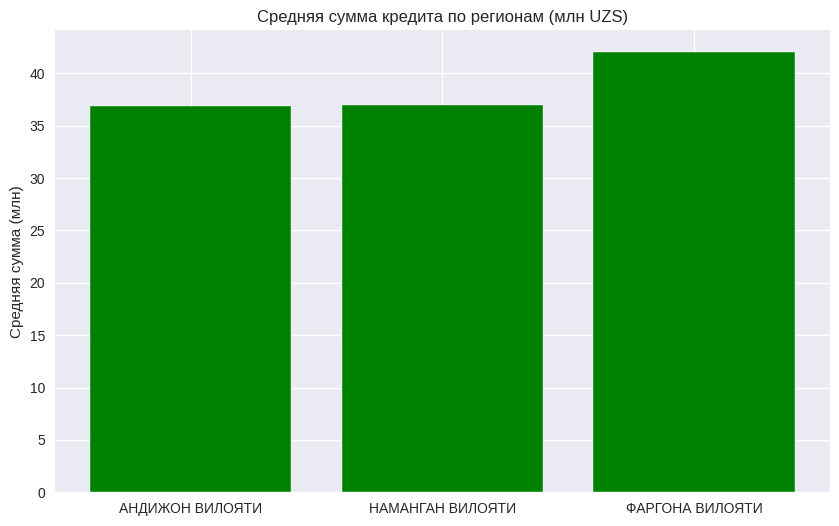

In [25]:
plt.bar(region_grp.index, region_grp["avg_amount"]/1e6, color="green")
plt.title("Средняя сумма кредита по регионам (млн UZS)")
plt.ylabel("Средняя сумма (млн)")
plt.show()


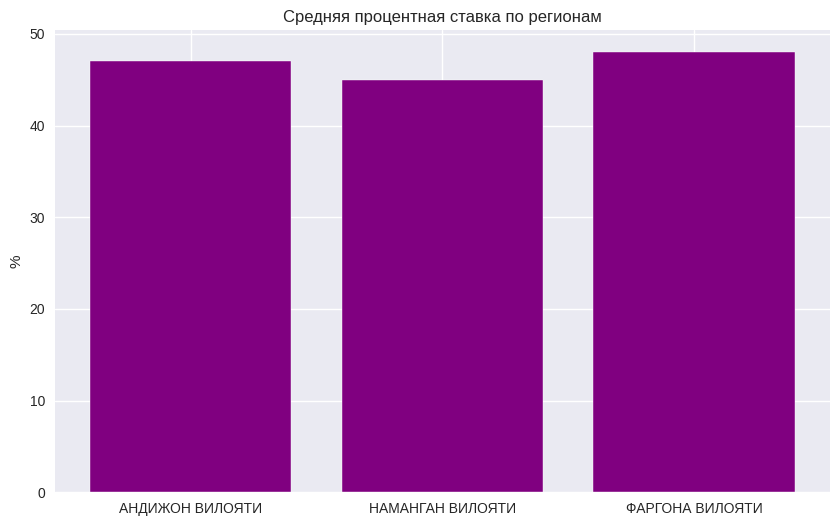

In [26]:
plt.bar(region_grp.index, region_grp["avg_rate"], color="purple")
plt.title("Средняя процентная ставка по регионам")
plt.ylabel("%")
plt.show()


In [27]:
district_grp = df.groupby(["Облать","Город/район"]).agg(
    sum_amount=("Сумма_num","sum"),
    count=("Код","count"),
    avg_amount=("Сумма_num","mean")
).sort_values("sum_amount", ascending=False)
district_grp.head(10)


sum_amount  count    avg_amount
Облать          Город/район                                         
АНДИЖОН ВИЛОЯТИ АНДИЖОН ШАХРИ      4.549500e+09    128  3.554297e+07
                АНДИЖОН ТУМАНИ     2.744000e+09     84  3.266667e+07
                АСАКА ТУМАНИ       2.372500e+09     54  4.393519e+07
                ОЛТИНКУЛ ТУМАНИ    1.180500e+09     32  3.689062e+07
                МАРХАМАТ ТУМАНИ    1.169000e+09     31  3.770968e+07
                БУЛОКБОШИ ТУМАНИ   1.153000e+09     30  3.843333e+07
                ШАХРИХОН ТУМАНИ    1.012500e+09     26  3.894231e+07
                ИЗБОСКАН ТУМАНИ    8.790000e+08     24  3.662500e+07
                ПАХТАОБОД ТУМАНИ   5.190000e+08     18  2.883333e+07
                ЖАЛОЛКУДУК ТУМАНИ  4.790000e+08     15  3.193333e+07

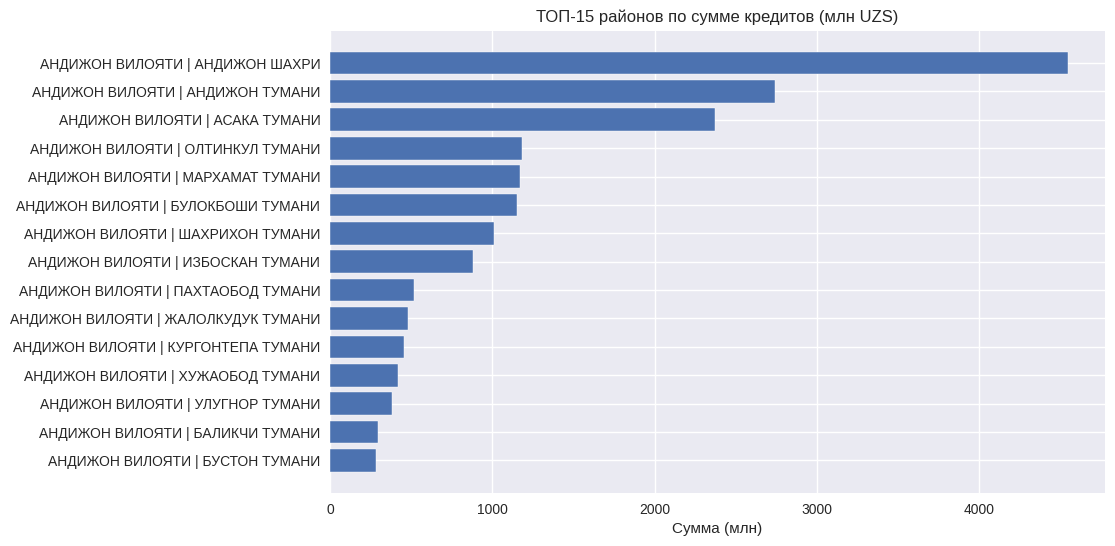

In [28]:
top_districts = district_grp.head(15)
plt.barh(
    [f"{r} | {d}" for r,d in top_districts.index[::-1]],
    top_districts["sum_amount"].values[::-1]/1e6
)
plt.title("ТОП-15 районов по сумме кредитов (млн UZS)")
plt.xlabel("Сумма (млн)")
plt.show()


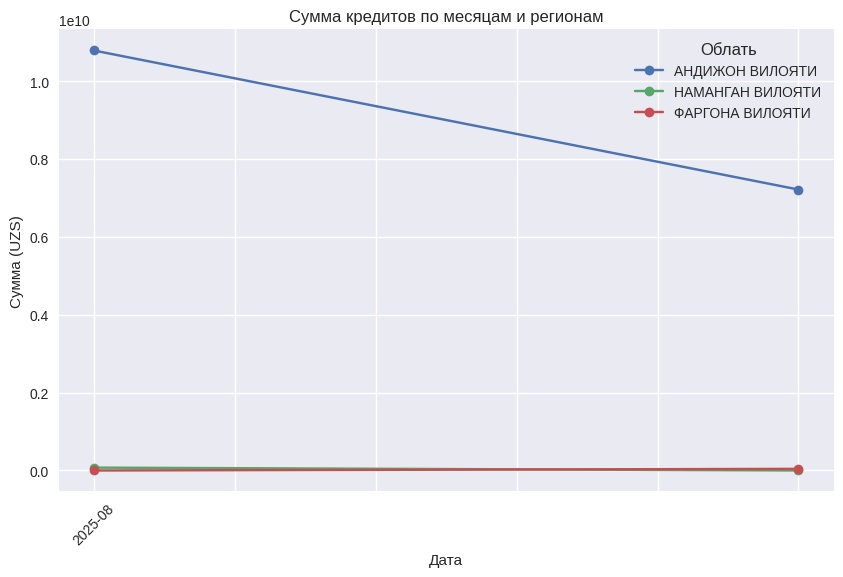

In [29]:
monthly = df.groupby([df["Дата"].dt.to_period("M"), "Облать"])["Сумма_num"].sum().unstack(fill_value=0)
monthly.index = monthly.index.astype(str)

monthly.plot(marker="o")
plt.title("Сумма кредитов по месяцам и регионам")
plt.ylabel("Сумма (UZS)")
plt.xticks(rotation=45)
plt.show()


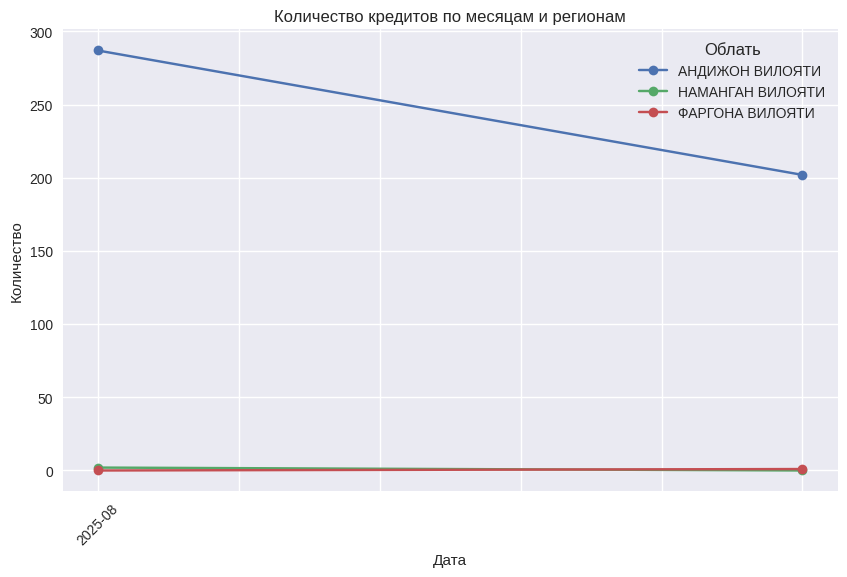

In [30]:
monthly_count = df.groupby([df["Дата"].dt.to_period("M"), "Облать"])["Код"].count().unstack(fill_value=0)
monthly_count.index = monthly_count.index.astype(str)

monthly_count.plot(marker="o")
plt.title("Количество кредитов по месяцам и регионам")
plt.ylabel("Количество")
plt.xticks(rotation=45)
plt.show()


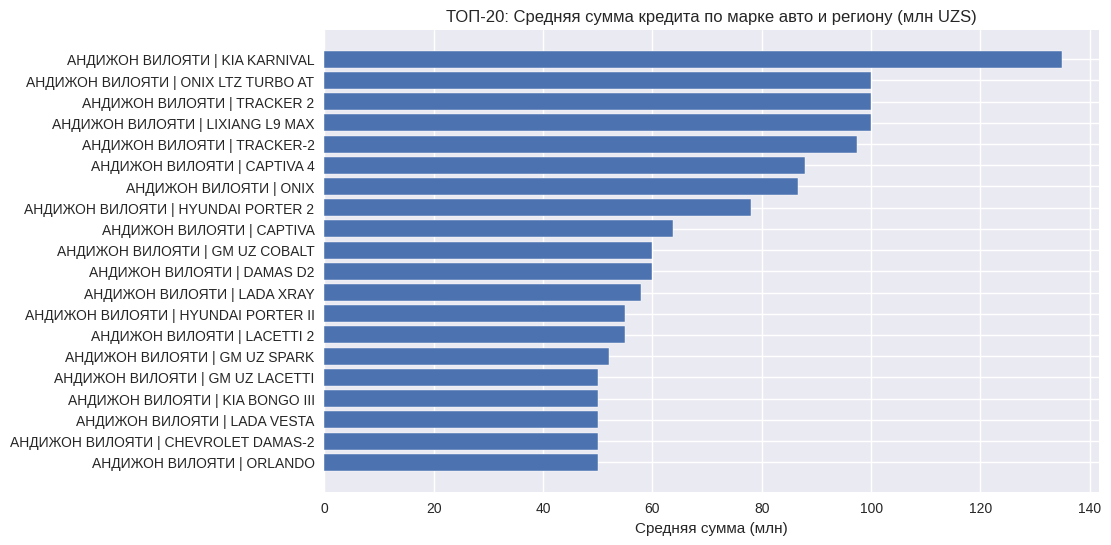

In [31]:
brand_region = df.groupby(["Облать","Марка"])["Сумма_num"].mean().reset_index()
top = brand_region.sort_values("Сумма_num", ascending=False).head(20)

plt.barh([f"{r} | {b}" for r,b in top[["Облать","Марка"]].values[::-1]],
         top["Сумма_num"].values[::-1]/1e6)
plt.title("ТОП-20: Средняя сумма кредита по марке авто и региону (млн UZS)")
plt.xlabel("Средняя сумма (млн)")
plt.show()


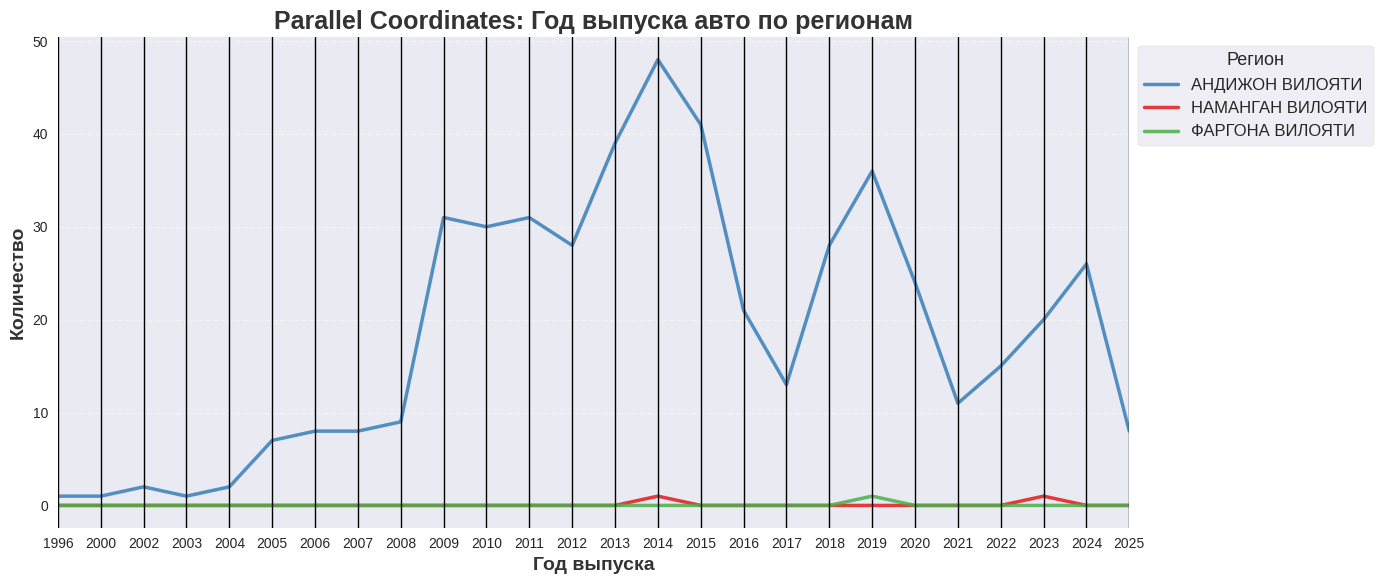

In [43]:
from pandas.plotting import parallel_coordinates

pivot_reset = pivot.reset_index()

plt.figure(figsize=(14, 6))
parallel_coordinates(
    pivot_reset,
    "Облать",
    color=["#377eb8", "#e41a1c", "#4daf4a"],  # Distinct colors for each region
    linewidth=2.5,
    alpha=0.85
)
plt.title("Parallel Coordinates: Год выпуска авто по регионам", fontsize=18, fontweight="bold", color="#333333")
plt.xlabel("Год выпуска", fontsize=14, fontweight="bold", color="#333333")
plt.ylabel("Количество", fontsize=14, fontweight="bold", color="#333333")
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend(title="Регион", fontsize=12, title_fontsize=13, loc="upper left", bbox_to_anchor=(1, 1), frameon=True)
plt.tight_layout()
plt.show()


/tmp/ipykernel_121190/341737497.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=region_sum.index, x=region_sum.values, ax=ax[0], palette="viridis")
/tmp/ipykernel_121190/341737497.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=region_count.index, x=region_count.values, ax=ax[1], palette="crest")


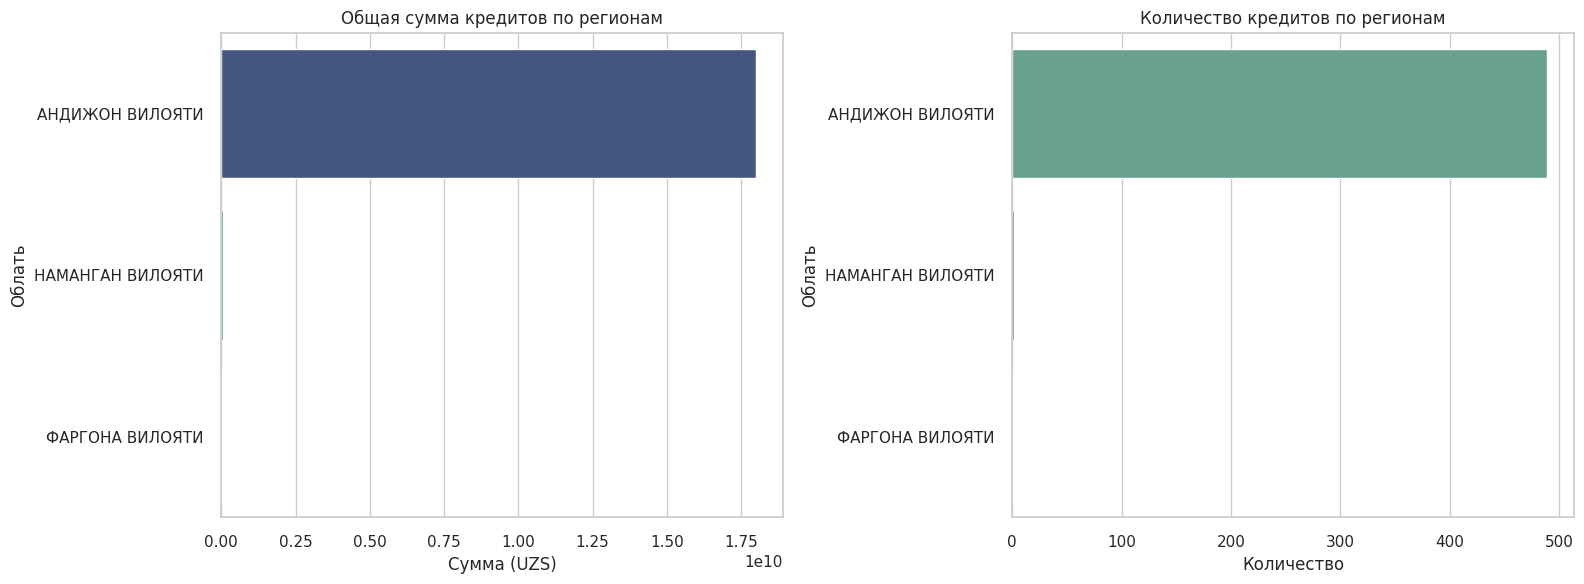

In [5]:
region_sum = df.groupby("Облать")["Сумма_num"].sum().sort_values(ascending=False)
region_count = df["Облать"].value_counts()

fig, ax = plt.subplots(1,2, figsize=(16,6))
sns.barplot(y=region_sum.index, x=region_sum.values, ax=ax[0], palette="viridis")
ax[0].set_title("Общая сумма кредитов по регионам")
ax[0].set_xlabel("Сумма (UZS)")

sns.barplot(y=region_count.index, x=region_count.values, ax=ax[1], palette="crest")
ax[1].set_title("Количество кредитов по регионам")
ax[1].set_xlabel("Количество")

plt.tight_layout()
plt.savefig(REPORTS_DIR / "region_analysis.png", dpi=150)
plt.show()


/tmp/ipykernel_121190/2463921756.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=brand_sum.index, x=brand_sum.values, ax=ax[0], palette="mako")
/tmp/ipykernel_121190/2463921756.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=brand_count.index, x=brand_count.values, ax=ax[1], palette="flare")


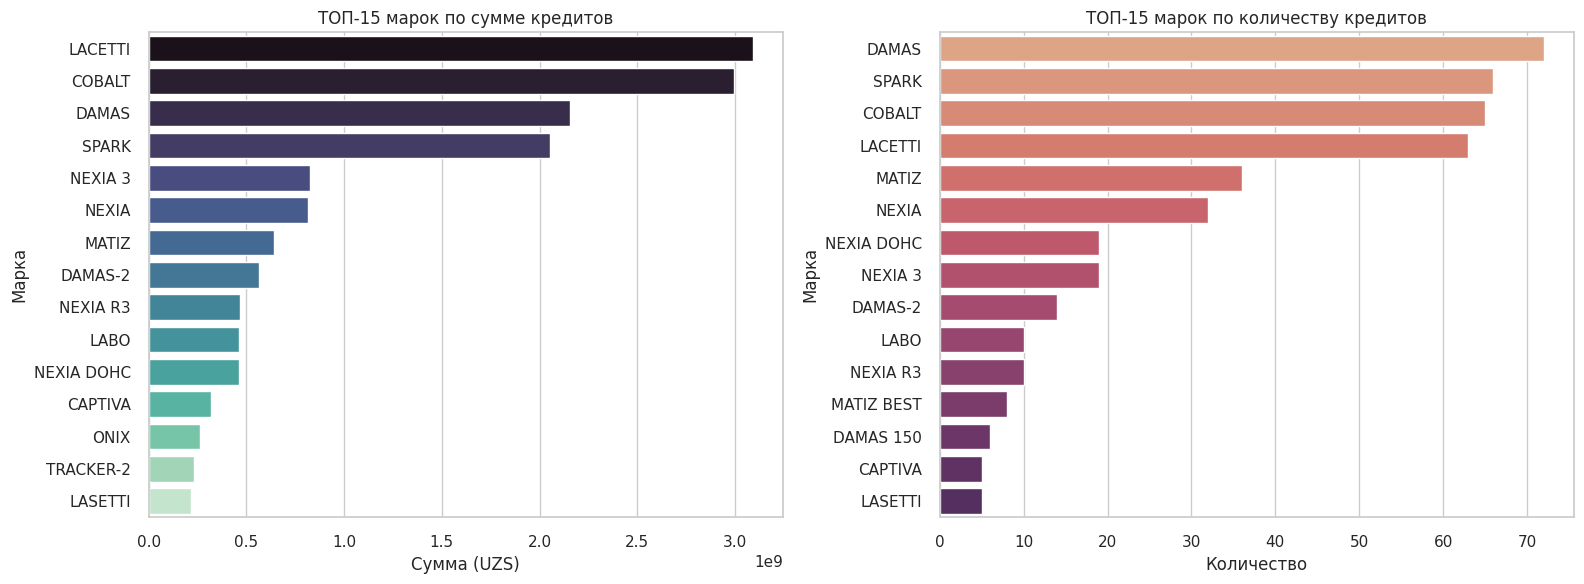

In [6]:
brand_sum = df.groupby("Марка")["Сумма_num"].sum().sort_values(ascending=False).head(15)
brand_count = df["Марка"].value_counts().head(15)

fig, ax = plt.subplots(1,2, figsize=(16,6))
sns.barplot(y=brand_sum.index, x=brand_sum.values, ax=ax[0], palette="mako")
ax[0].set_title("ТОП-15 марок по сумме кредитов")
ax[0].set_xlabel("Сумма (UZS)")

sns.barplot(y=brand_count.index, x=brand_count.values, ax=ax[1], palette="flare")
ax[1].set_title("ТОП-15 марок по количеству кредитов")
ax[1].set_xlabel("Количество")

plt.tight_layout()
plt.savefig(REPORTS_DIR / "brand_analysis.png", dpi=150)
plt.show()


/tmp/ipykernel_121190/3344936057.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Тип кузова", data=df, order=df["Тип кузова"].value_counts().index, palette="pastel")


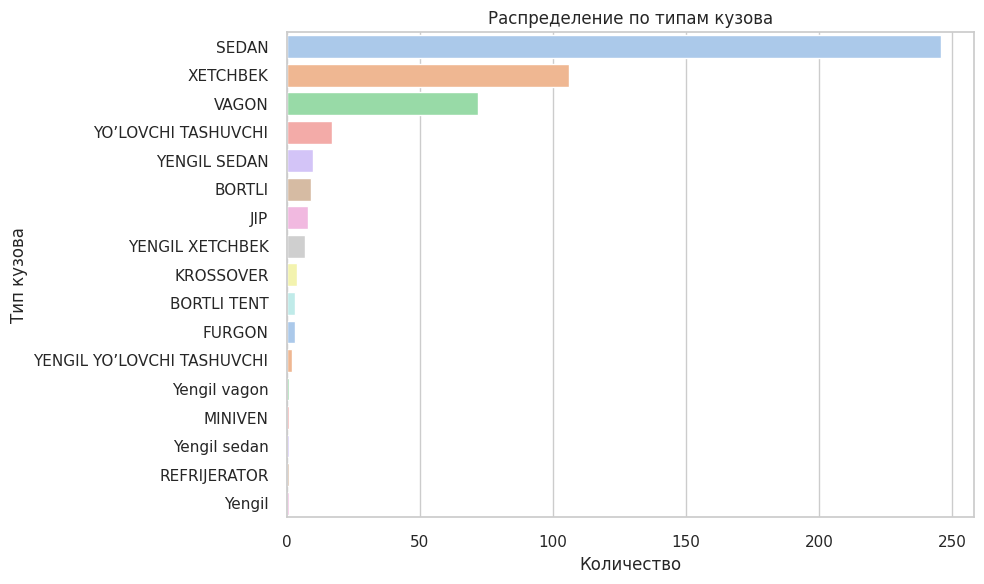

In [7]:
plt.figure(figsize=(10,6))
sns.countplot(y="Тип кузова", data=df, order=df["Тип кузова"].value_counts().index, palette="pastel")
plt.title("Распределение по типам кузова")
plt.xlabel("Количество")
plt.tight_layout()
plt.savefig(REPORTS_DIR / "bodytype.png", dpi=150)
plt.show()


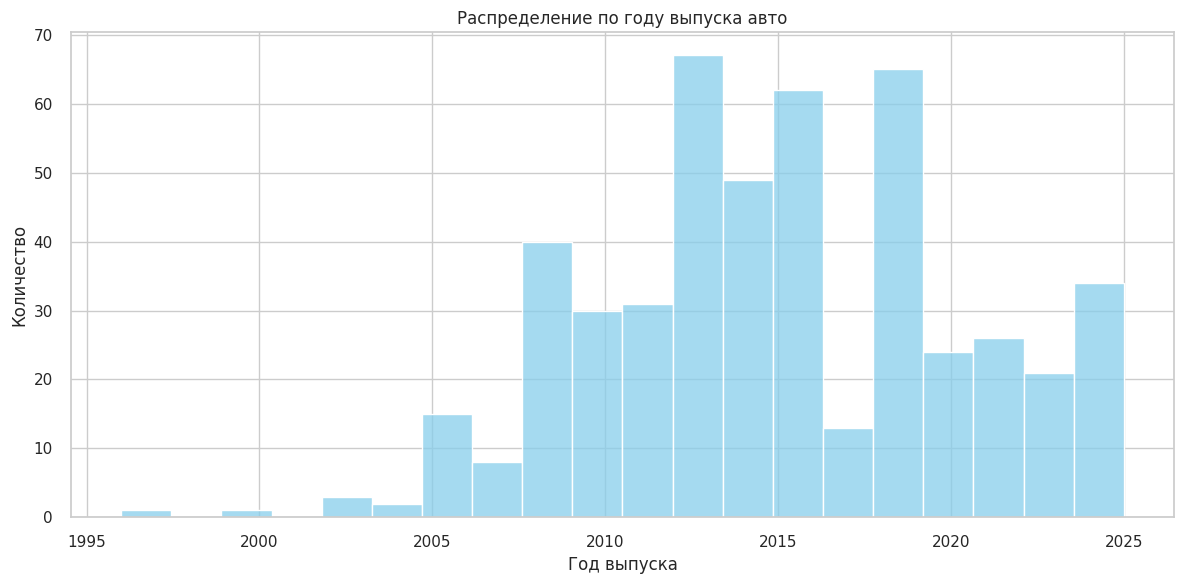

In [8]:
plt.figure(figsize=(12,6))
sns.histplot(df["Год выпуска"], bins=20, kde=False, color="skyblue")
plt.title("Распределение по году выпуска авто")
plt.xlabel("Год выпуска")
plt.ylabel("Количество")
plt.tight_layout()
plt.savefig(REPORTS_DIR / "year_hist.png", dpi=150)
plt.show()


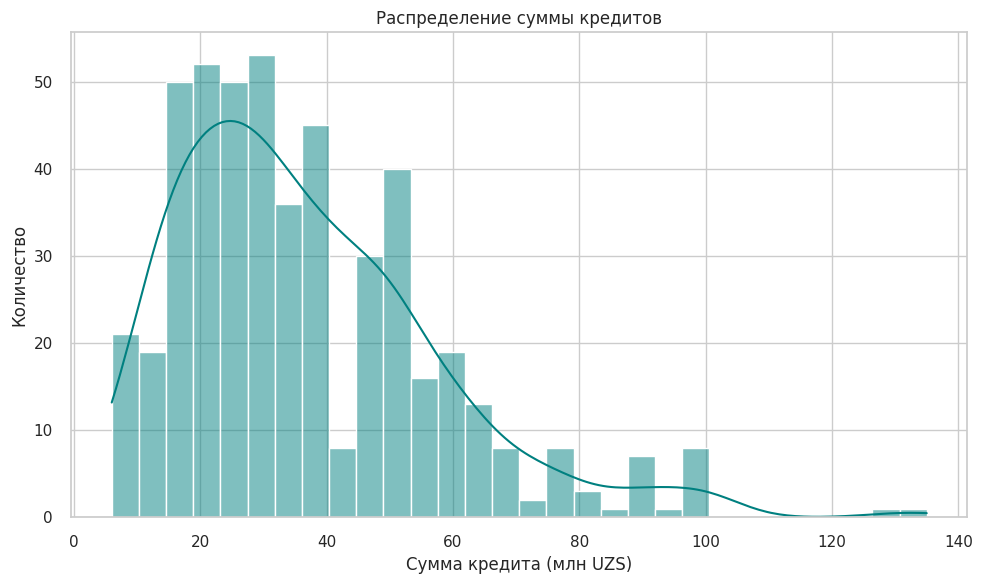

In [9]:
plt.figure(figsize=(10,6))
sns.histplot(df["Сумма_num"]/1e6, bins=30, kde=True, color="teal")
plt.title("Распределение суммы кредитов")
plt.xlabel("Сумма кредита (млн UZS)")
plt.ylabel("Количество")
plt.tight_layout()
plt.savefig(REPORTS_DIR / "loan_distribution.png", dpi=150)
plt.show()


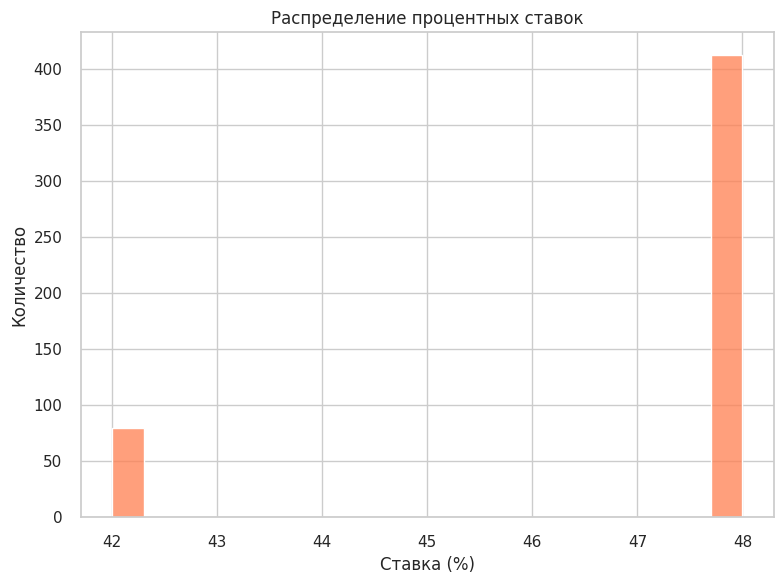

In [10]:
plt.figure(figsize=(8,6))
sns.histplot(df["% ставка"], bins=20, kde=False, color="coral")
plt.title("Распределение процентных ставок")
plt.xlabel("Ставка (%)")
plt.ylabel("Количество")
plt.tight_layout()
plt.savefig(REPORTS_DIR / "rate_distribution.png", dpi=150)
plt.show()


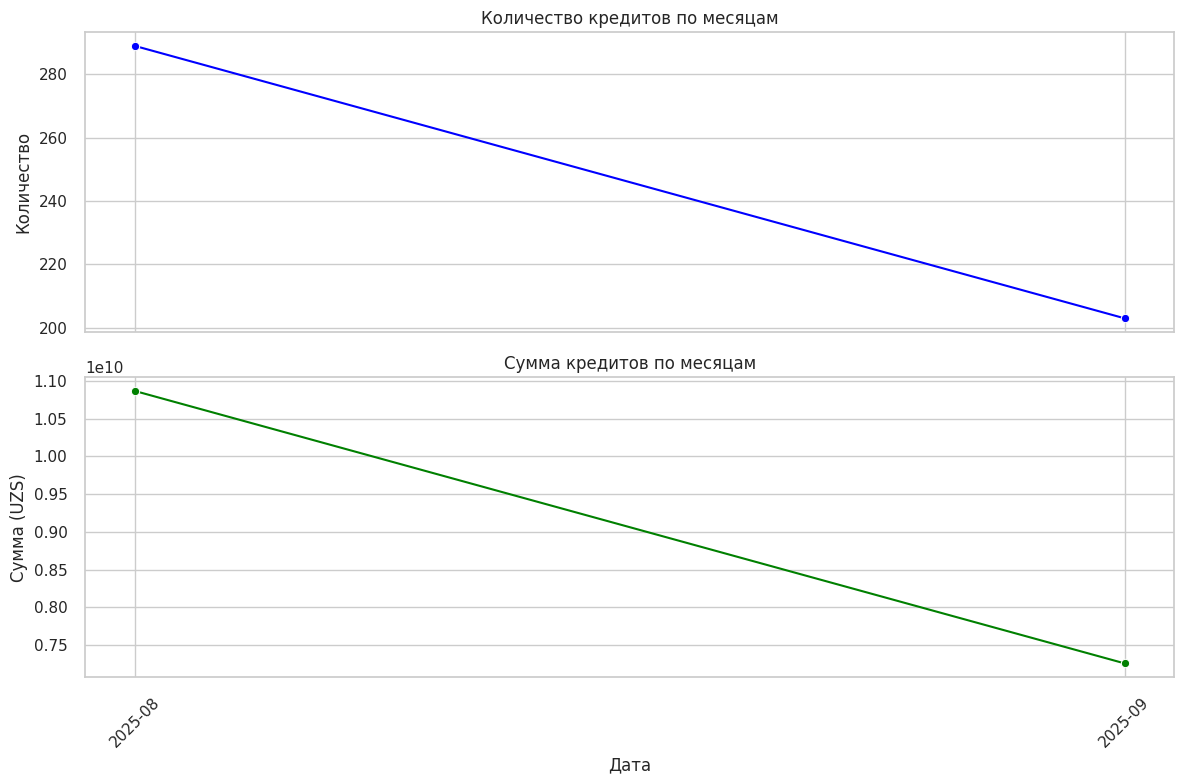

In [11]:
monthly = df.groupby(df["Дата"].dt.to_period("M")).agg({
    "Сумма_num":"sum",
    "Код":"count"
})
monthly.index = monthly.index.astype(str)

fig, ax = plt.subplots(2,1, figsize=(12,8), sharex=True)
sns.lineplot(x=monthly.index, y=monthly["Код"], marker="o", ax=ax[0], color="blue")
ax[0].set_title("Количество кредитов по месяцам")
ax[0].set_ylabel("Количество")
ax[0].tick_params(axis="x", rotation=45)

sns.lineplot(x=monthly.index, y=monthly["Сумма_num"], marker="o", ax=ax[1], color="green")
ax[1].set_title("Сумма кредитов по месяцам")
ax[1].set_ylabel("Сумма (UZS)")
ax[1].tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.savefig(REPORTS_DIR / "monthly_trends.png", dpi=150)
plt.show()


/tmp/ipykernel_121190/3426009379.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=avg_brand.index, x=avg_brand.values, palette="rocket")


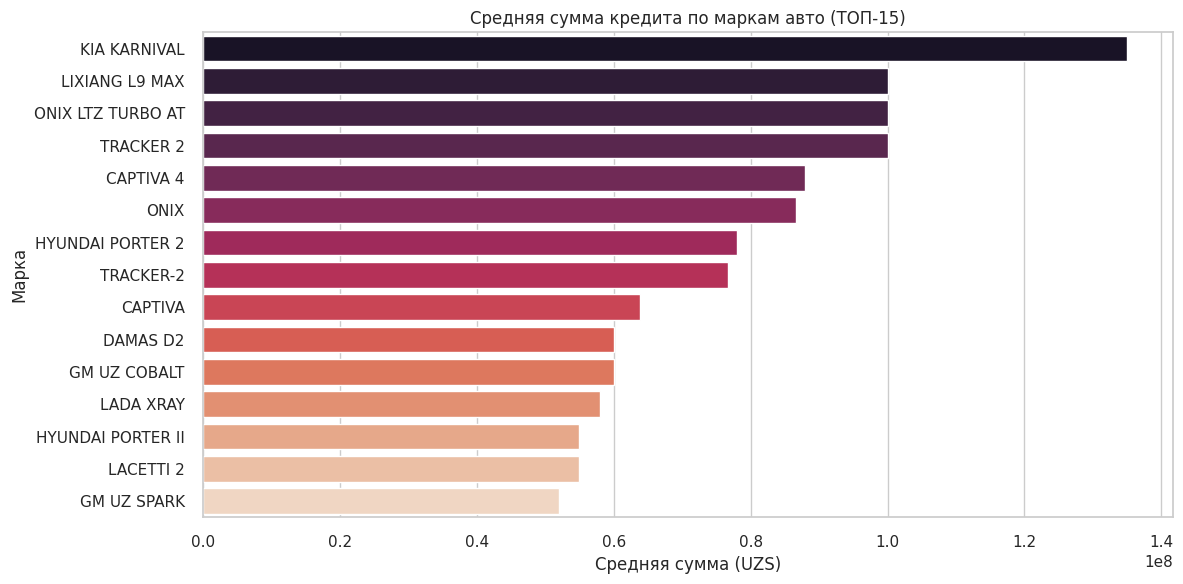

In [12]:
avg_brand = df.groupby("Марка")["Сумма_num"].mean().sort_values(ascending=False).head(15)

plt.figure(figsize=(12,6))
sns.barplot(y=avg_brand.index, x=avg_brand.values, palette="rocket")
plt.title("Средняя сумма кредита по маркам авто (ТОП-15)")
plt.xlabel("Средняя сумма (UZS)")
plt.tight_layout()
plt.savefig(REPORTS_DIR / "avg_loan_brand.png", dpi=150)
plt.show()


/tmp/ipykernel_121190/1284730307.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=avg_region.index, x=avg_region.values, palette="Spectral")


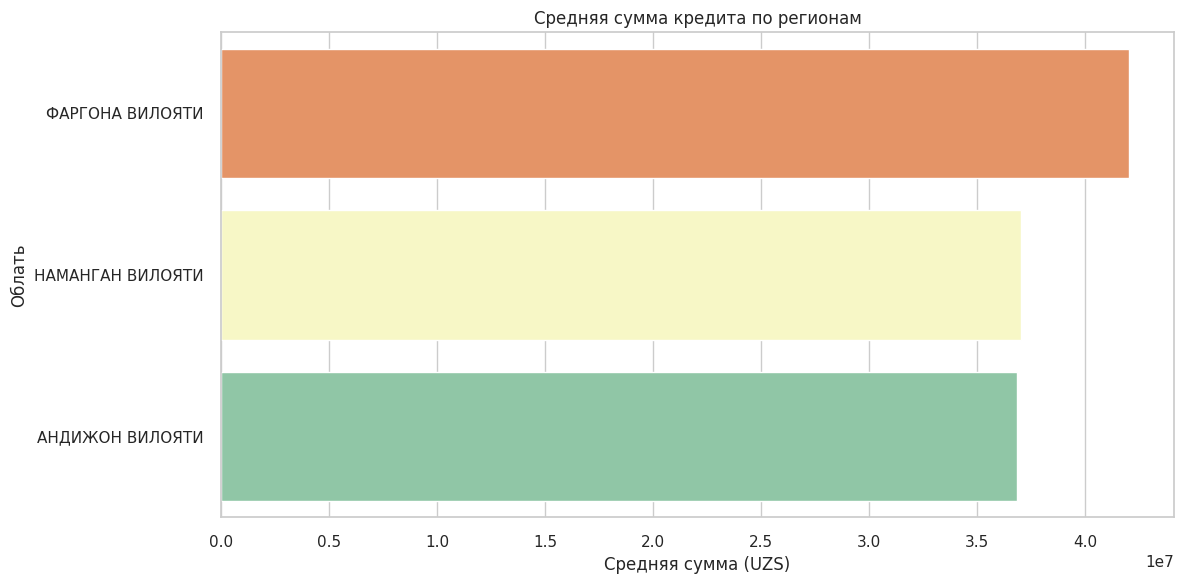

In [15]:
avg_region = df.groupby("Облать")["Сумма_num"].mean().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(y=avg_region.index, x=avg_region.values, palette="Spectral")
plt.title("Средняя сумма кредита по регионам")
plt.xlabel("Средняя сумма (UZS)")
plt.tight_layout()
plt.savefig(REPORTS_DIR / "avg_loan_region.png", dpi=150)
plt.show()


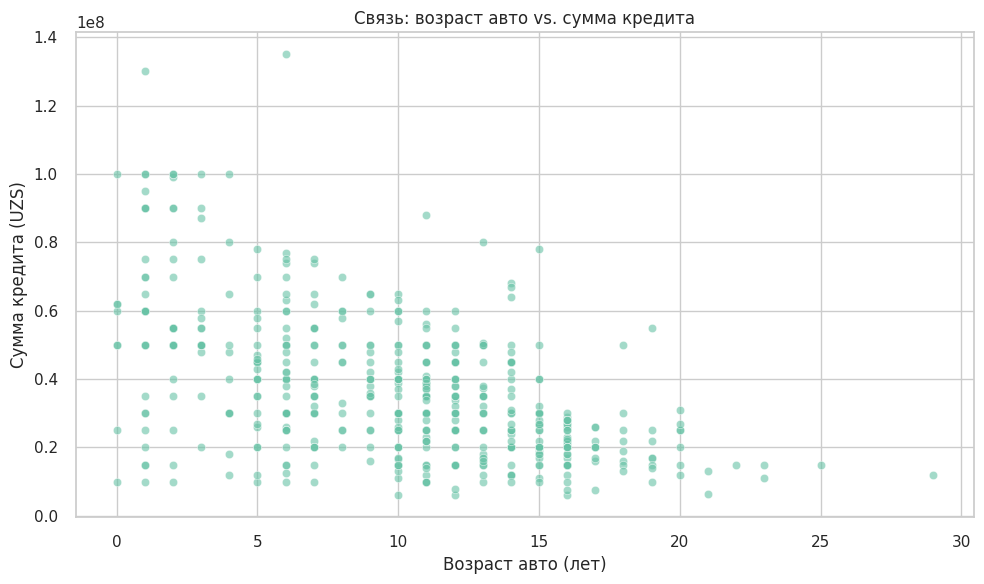

In [16]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="Возраст авто", y="Сумма_num", data=df, alpha=0.6)
plt.title("Связь: возраст авто vs. сумма кредита")
plt.xlabel("Возраст авто (лет)")
plt.ylabel("Сумма кредита (UZS)")
plt.tight_layout()
plt.savefig(REPORTS_DIR / "loan_vs_age.png", dpi=150)
plt.show()


In [19]:
REPORT_DIR = Path("report"); REPORTS_DIR.mkdir(exist_ok=True)

region_sum.to_csv(REPORT_DIR / "region_sum.csv")
brand_sum.to_csv(REPORT_DIR / "brand_sum.csv")
monthly.to_csv(REPORT_DIR / "monthly.csv")
print("All summaries & charts saved in 'report/' folder")


All summaries & charts saved in 'report/' folder
